In [21]:
import matplotlib.pyplot as plt
import scipy.fft as spt  
import numpy as np
import scipy.optimize as so




def invF(dt,A,xlimf='none',xlimt='none', plot='yes', output='no', absolute='yes',norm='no', positiveoutput='no'): #same as last cell but for inverse transform
    n=np.size(A)
    f=spt.fftfreq(n,d=dt)
    t=np.arange(0,n*dt/2,dt)
    #for i in f:
    #    print(i)
    #print(t)
    #print(A)
    if absolute=='no':
        if norm=='yes':
            Y0=(spt.ifft(A))/np.size(f)
        if norm=='no':
            Y0=(spt.ifft(A))
    if absolute=='yes':
        if norm=='yes':    
            Y0=abs(spt.ifft(A))/np.size(f)
        if norm=='no':
            Y0=abs(spt.ifft(A))
    Y=[]
    for i in range(len(Y0)//2):      #only plots the positive part of the time domain since negative part does not have physical meaning
        Y.append(Y0[i])

    if plot=='yes':
        plt.subplot(1,2,1)
        plt.plot(f,A,'.')
        if xlimf!='none':
            plt.xlim([-xlimf,xlimf])
        plt.xlabel('Frequency(hz)')
        plt.ylabel('Power')
        plt.title('Frequency Domain')
    
        plt.subplot(1,2,2)
        plt.plot(t,Y,'.')
        if xlimt!='none':
            plt.xlim([0,xlimt])
        plt.xlabel('Time(s)')
        plt.ylabel('Unitless Flux')
        plt.title('Time Domain')
    
    if output=='yes':
        if positiveoutput=='yes':
            return Y
        else:
            return Y0              #negative part of time domain is necessary for further transformation
        


/var/folders/2b/0yvwmnkj2rx7bx28lfwg9zl80000gn/T/ipykernel_22112/3208332299.py:5: RuntimeWarning: divide by zero encountered in true_divide
  S=(1/w)**noise


[-165.52204819  -64.11648725   57.81610111 ... -100.68885026   57.81610111
  -64.11648725]


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


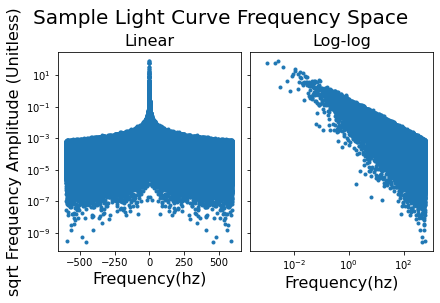

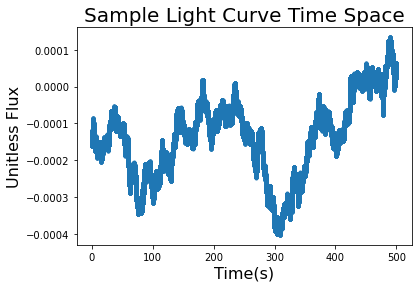

In [22]:
def gendata(T,dt,noise=2,plot=True,output=True):
    n=2*int(T//dt)
    F=spt.fftfreq(n,d=dt)
    w=2*np.pi*F
    S=(1/w)**noise
#    S=[]
#    for i in range(1,len(Sw)):
#        S.append(Sw[i])
#    print(F)
    S[0]=S[1]
#    print(S)
#    S[1]=S[1]
#    S[-1]=0
#e
    re=[]
    im=[]
    for i in range(len(F)):
        if F[i]>=0:
            r=np.random.normal(0,1,2)
            re.append((0.5*S[i])**0.5*r[0])
    for i in range(len(re)):
        im.append(re[-i])
    y=np.concatenate([re,im])


    print(y)
#    print(re)
#    print(im)
#    print(y)
    #for i in y:
    #    print(i)
    M=invF(dt,re,output='yes',absolute='no',positiveoutput='yes',plot='no')
    t=np.arange(0,np.size(M)*dt,dt)
    
    if plot==True:
        fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, sharey=True)
        ax1.plot(F,y,'.')
        ax1.set_title('Linear', size=16)
        ax1.set_xlabel('Frequency(hz)', size=16)
        ax1.set_ylabel('sqrt Frequency Amplitude (Unitless)', size=16)
        ax2.loglog(F,y,'.')
        ax2.set_xlabel('Frequency(hz)', size=16)
        ax2.set_title('Log-log', size=16)
        fig.suptitle('Sample Light Curve Frequency Space', fontsize=20)
    
        plt.figure()
        plt.plot(t,M,'.')
        plt.xlabel('Time(s)', size=16)
        plt.ylabel('Unitless Flux', size=16)
        plt.title('Sample Light Curve Time Space',size=20)
        #plt.xlim(0.79,0.81)

    if output==True:
        tr=[]
        mr=[]
        for i in range(len(t)):
            tr.append(t[i])
            mr.append(np.real(M[i]))
        return tr,mr
curve=(gendata(1000,1/1200))